In [1]:
import pandas as pd

cic_sample_path = 'C:/Users/katsa/Documents/cicids_sample.csv'
nb15_path = 'C:/Users/katsa/Documents/nb15_dataset.csv'

In [2]:
full_nb15_dataset = pd.read_csv(nb15_path)
nb_selected_df = pd.DataFrame()

nb_selected_df['dsport'] = full_nb15_dataset['dsport']
nb_selected_df['dur'] = full_nb15_dataset['dur'] * 10**3 # dur is probably in milliseconds, while cic's flow duration is in microseconds
nb_selected_df['Spkts'] = full_nb15_dataset['Spkts']
nb_selected_df['Dpkts'] = full_nb15_dataset['Dpkts']
nb_selected_df['sbytes'] = full_nb15_dataset['sbytes']
nb_selected_df['dbytes'] = full_nb15_dataset['dbytes']
nb_selected_df['smeansz'] = full_nb15_dataset['smeansz']
nb_selected_df['dmeansz'] = full_nb15_dataset['dmeansz']
nb_selected_df['flow_bytes/s'] = (full_nb15_dataset['sbytes'] + full_nb15_dataset['dbytes']) / (full_nb15_dataset['dur'] / 10**3) # (sbytes+dbytes)/dur
nb_selected_df['flow_packets/s'] = (full_nb15_dataset['Spkts'] + full_nb15_dataset['Dpkts']) / (full_nb15_dataset['dur']  / 10**3) # (Spkts+Dpkts)/dur
#nb_selected_df['Sintpkt'] = full_nb15_dataset['Sintpkt'] # although the two datasets do seem to share the following two features, there can not be an easy way to compute them in nfstream so i'm commenting them out..
#nb_selected_df['Dintpkt'] = full_nb15_dataset['Dintpkt'] # same,  the corresponding cic features are most likely 'Fwd IAT Total' and 'Bwd IAT Total'
nb_selected_df['fwd_packets/s'] = full_nb15_dataset['Spkts'] / (full_nb15_dataset['dur'] / 10**3) # Spkts/dur
nb_selected_df['bwd_packets/s'] = full_nb15_dataset['Dpkts'] / (full_nb15_dataset['dur'] / 10**3)
nb_selected_df['Label'] = full_nb15_dataset['Label']

C:\Users\katsa\AppData\Local\Temp\ipykernel_3064\1229676633.py:1: DtypeWarning: Columns (2,4,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  full_nb15_dataset = pd.read_csv(nb15_path)


In [3]:
nb_sample_selected_df = nb_selected_df.sample(frac=0.05, random_state=1)

In [4]:
selected_features_cic = ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 
                         'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Mean', 
                         'Bwd Packet Length Mean', 'Flow Bytes/s', 'Flow Packets/s', 
                         #'Fwd IAT Total', 'Bwd IAT Total', 
                         'Fwd Packets/s', 'Bwd Packets/s', 'Label']

In [5]:
cic_sample_df = pd.read_csv(cic_sample_path)
cic_sample_selected_df = cic_sample_df[selected_features_cic]

BENIGN                        113747
DoS Hulk                       11654
PortScan                        7838
DDoS                            6323
DoS GoldenEye                    488
FTP-Patator                      397
DoS slowloris                    321
SSH-Patator                      305
DoS Slowhttptest                 268
Bot                               99
Web Attack � Brute Force          64
Web Attack � XSS                  31
Web Attack � Sql Injection         2
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


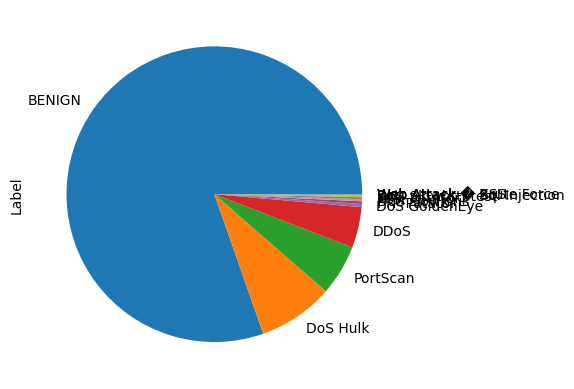

In [6]:
labels_cic = cic_sample_selected_df['Label']
print(labels_cic.value_counts())
print(labels_cic.value_counts().plot.pie())

0    110884
1     16118
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


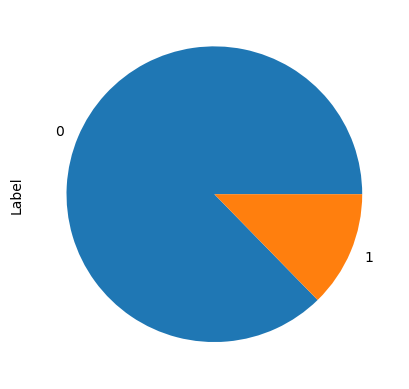

In [7]:
labels_nb = nb_sample_selected_df['Label']
print(labels_nb.value_counts())
print(labels_nb.value_counts().plot.pie())

BENIGN    113747
ATTACK     27790
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


C:\Users\katsa\AppData\Local\Temp\ipykernel_3064\1917602395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cic_sample_selected_df['Label'].replace(label, 'ATTACK', inplace=True)


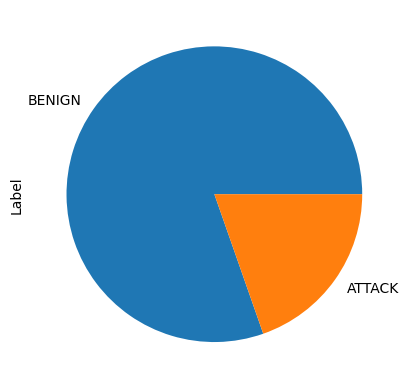

In [8]:
# fix labels, BENIGN -> 1, ATTACK -> 0


for label in labels_cic:
    if (label != 'BENIGN' and label != 'ATTACK'):
        cic_sample_selected_df['Label'].replace(label, 'ATTACK', inplace=True)
        
labels = cic_sample_selected_df['Label']
print(labels.value_counts())
print(labels.value_counts().plot.pie())

BENIGN    110884
ATTACK     16118
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


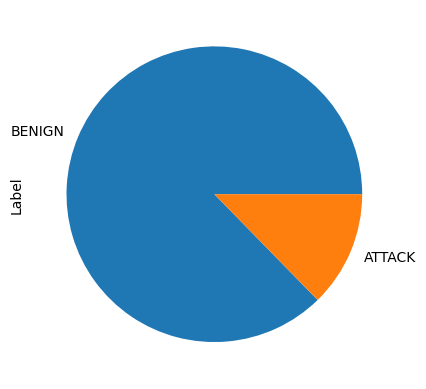

In [9]:
nb_sample_selected_df['Label'].replace(0, 'BENIGN', inplace=True)
nb_sample_selected_df['Label'].replace(1, 'ATTACK', inplace=True)

labels = nb_sample_selected_df['Label']
print(labels.value_counts())
print(labels.value_counts().plot.pie())

In [10]:
nb_sample_selected_df.head()

,dsport,dur,Spkts,Dpkts,sbytes,dbytes,smeansz,dmeansz,flow_bytes/s,flow_packets/s,fwd_packets/s,bwd_packets/s,Label
102099,53,1.077,2,2,146,178,73,89,3.008357e+08,3.714020e+06,1.857010e+06,1.857010e+06,BENIGN
264133,41336,524.664,6,8,320,1936,53,242,4.299895e+06,2.668374e+04,1.143589e+04,1.524785e+04,BENIGN
2491744,14516,192.301,84,86,4862,78556,58,913,4.337887e+08,8.840308e+05,4.368152e+05,4.472156e+05,BENIGN
1024972,5190,49.336,14,14,1168,2364,83,169,7.159072e+07,5.675369e+05,2.837684e+05,2.837684e+05,BENIGN
591639,22,20.147,108,114,9504,12298,88,108,1.082146e+09,1.101901e+07,5.360600e+06,5.658411e+06,BENIGN


In [11]:
cic_sample_selected_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Bwd Packets/s,Label
0,80,249,2,0,0,0,0.0,0.0,0.0,8.032129e+03,8.032129e+03,0.00000,ATTACK
1,80,1,2,0,0,0,0.0,0.0,0.0,2.000000e+06,2.000000e+06,0.00000,ATTACK
2,55209,15,1,1,0,0,0.0,0.0,0.0,1.333333e+05,6.666667e+04,66666.66667,BENIGN
3,36778,3,2,0,0,0,0.0,0.0,0.0,6.666667e+05,6.666667e+05,0.00000,BENIGN
4,54347,25,1,1,0,0,0.0,0.0,0.0,8.000000e+04,4.000000e+04,40000.00000,BENIGN


In [12]:
nb_sample_selected_df.set_axis(cic_sample_selected_df.columns, axis="columns", inplace=True)
combined_sample = pd.concat([cic_sample_selected_df, nb_sample_selected_df], axis=0, ignore_index=True)
combined_sample.head()

C:\Users\katsa\AppData\Local\Temp\ipykernel_3064\1530961674.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  nb_sample_selected_df.set_axis(cic_sample_selected_df.columns, axis="columns", inplace=True)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Bwd Packets/s,Label
0,80,249.0,2,0,0,0,0.0,0.0,0.0,8.032129e+03,8.032129e+03,0.00000,ATTACK
1,80,1.0,2,0,0,0,0.0,0.0,0.0,2.000000e+06,2.000000e+06,0.00000,ATTACK
2,55209,15.0,1,1,0,0,0.0,0.0,0.0,1.333333e+05,6.666667e+04,66666.66667,BENIGN
3,36778,3.0,2,0,0,0,0.0,0.0,0.0,6.666667e+05,6.666667e+05,0.00000,BENIGN
4,54347,25.0,1,1,0,0,0.0,0.0,0.0,8.000000e+04,4.000000e+04,40000.00000,BENIGN


In [13]:
len(cic_sample_selected_df)

141537

In [14]:
combined_sample.iloc[[141537]]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Bwd Packets/s,Label
141537,53,1.077,2,2,146,178,73.0,89.0,3.008357e+08,3.714020e+06,1.857010e+06,1.857010e+06,BENIGN


In [15]:
y = combined_sample['Label']
X = combined_sample.drop(columns=['Label'])

In [16]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

ATTACK    224631
BENIGN    224631
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


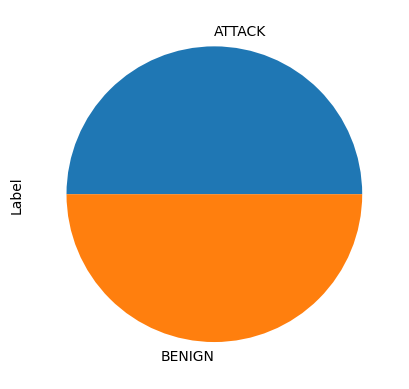

In [17]:
print(y_resampled.value_counts())
print(y_resampled.value_counts().plot.pie())

In [18]:
y_resampled.replace('BENIGN', 1, inplace=True)
y_resampled.replace('ATTACK', 0, inplace=True)

In [19]:
y_resampled.head()

0    0
1    0
2    1
3    1
4    1
Name: Label, dtype: int64

In [20]:
combined_dataset_balanced = X_resampled
combined_dataset_balanced.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Bwd Packets/s
0,80,249.0,2,0,0,0,0.0,0.0,0.0,8.032129e+03,8.032129e+03,0.00000
1,80,1.0,2,0,0,0,0.0,0.0,0.0,2.000000e+06,2.000000e+06,0.00000
2,55209,15.0,1,1,0,0,0.0,0.0,0.0,1.333333e+05,6.666667e+04,66666.66667
3,36778,3.0,2,0,0,0,0.0,0.0,0.0,6.666667e+05,6.666667e+05,0.00000
4,54347,25.0,1,1,0,0,0.0,0.0,0.0,8.000000e+04,4.000000e+04,40000.00000


In [21]:
combined_dataset_balanced['Label'] = y_resampled

In [22]:
combined_dataset_balanced.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Fwd Packets/s,Bwd Packets/s,Label
0,80,249.0,2,0,0,0,0.0,0.0,0.0,8.032129e+03,8.032129e+03,0.00000,0
1,80,1.0,2,0,0,0,0.0,0.0,0.0,2.000000e+06,2.000000e+06,0.00000,0
2,55209,15.0,1,1,0,0,0.0,0.0,0.0,1.333333e+05,6.666667e+04,66666.66667,1
3,36778,3.0,2,0,0,0,0.0,0.0,0.0,6.666667e+05,6.666667e+05,0.00000,1
4,54347,25.0,1,1,0,0,0.0,0.0,0.0,8.000000e+04,4.000000e+04,40000.00000,1


In [23]:
combined_dataset_balanced['Destination Port'] = pd.to_numeric(combined_dataset_balanced['Destination Port'], errors='coerce')

In [24]:
combined_dataset_balanced.to_csv('combined_dataset_balanced.csv', index=False)

In [25]:
y_tmp = combined_dataset_balanced['Label']
X_tmp = combined_dataset_balanced.drop(columns=['Label'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tmp, y_tmp, test_size=0.33, random_state=42)

In [26]:
combined_dataset_balanced_train = X_train
combined_dataset_balanced_train['Label'] = y_train

combined_dataset_balanced_test = X_test
combined_dataset_balanced_test['Label'] = y_test

combined_dataset_balanced_train.to_csv('combined_dataset_balanced_train.csv', index=False)
combined_dataset_balanced_test.to_csv('combined_dataset_balanced_test.csv', index=False)